In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import astropy.units as u # I use astropy units in everything, very helpful for bookkeeping/debugging

from lim import lim # The base intensity mapping object

matplotlib.rcParams.update({'font.size': 18,'figure.figsize':[8,7]}) # Make figures better
#matplotlib.rcParams,update({}'figure.figsize'] = [8,7]
from scipy.ndimage import gaussian_filter
plt.rcParams["mathtext.fontset"] = "dejavuserif"

In [2]:
# Initialize LineModel with default model
m = lim()
m_cii = lim('Lichen_v3', doSim = True)

Input cosmological model does not match simulations
Setting analytic cosmology to match simulation


In [3]:
m_cii.update(model_par = {'zdex': 0.4,
 'M0': 1900000000.0,
 'Mmin': 20000000000,
 'alpha_MH1': 0.74,
 'alpha_LCII': 0.024,
 'BehrooziFile': 'sfr_reinterp.dat'},
            nuObs = 270*u.GHz,
            Delta_nu = 40*u.GHz,
             dnu = 2.8*u.GHz,
            tobs = 40000*u.h)

Single run:

In [4]:
cii_zdex04 = m_cii.maps

Loading .npz catalogues...


Text(0.5, 1.0, '$Histogram\\ of\\ Intensities$')

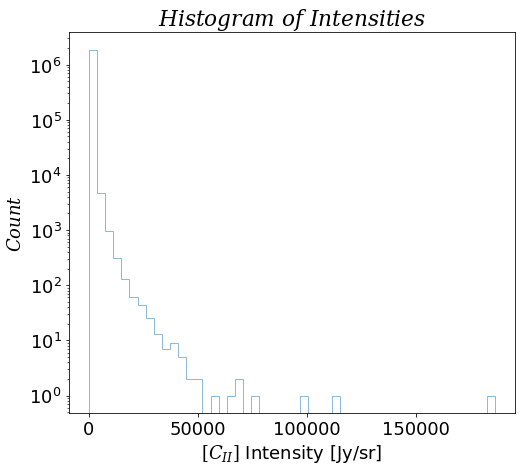

In [40]:
n_zdex04, bins, _ = plt.hist(cii_zdex04.value.flatten(), bins = 50, alpha = 0.5, histtype = 'step')

center = (bins[:-1] + bins[1:]) / 2
    
plt.xlabel(r'$[C_{II}]$ Intensity [Jy/sr]')
plt.ylabel(r'$Count$')
plt.yscale('log')
plt.title(r'$Histogram\ of\ Intensities$')

In [7]:
m_cii.update(model_par = {'zdex': 0.2,
 'M0': 1900000000.0,
 'Mmin': 20000000000,
 'alpha_MH1': 0.74,
 'alpha_LCII': 0.024,
 'BehrooziFile': 'sfr_reinterp.dat'},
            nuObs = 270*u.GHz,
            Delta_nu = 40*u.GHz,
             dnu = 2.8*u.GHz,
            tobs = 40000*u.h)

In [8]:
cii_zdex02 = m_cii.maps

Loading .npz catalogues...


Text(0.5, 1.0, '$Histogram\\ of\\ Intensities$')

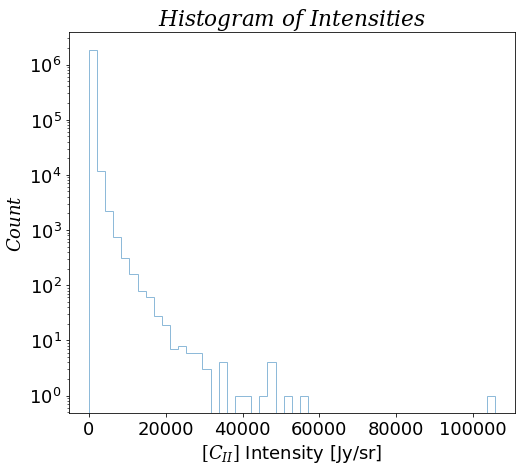

In [41]:
n_zdex02, bins, _ = plt.hist(cii_zdex02.value.flatten(), bins = 50, alpha = 0.5, histtype = 'step')

center = (bins[:-1] + bins[1:]) / 2
    
plt.xlabel(r'$[C_{II}]$ Intensity [Jy/sr]')
plt.ylabel(r'$Count$')
plt.yscale('log')
plt.title(r'$Histogram\ of\ Intensities$')

In [10]:
m_cii.update(model_par = {'zdex': 0.6,
 'M0': 1900000000.0,
 'Mmin': 20000000000,
 'alpha_MH1': 0.74,
 'alpha_LCII': 0.024,
 'BehrooziFile': 'sfr_reinterp.dat'},
            nuObs = 270*u.GHz,
            Delta_nu = 40*u.GHz,
            dnu = 2.8*u.GHz,
            tobs = 40000*u.h)

In [11]:
cii_zdex06 = m_cii.maps

Loading .npz catalogues...


Text(0.5, 1.0, '$Histogram\\ of\\ Intensities$')

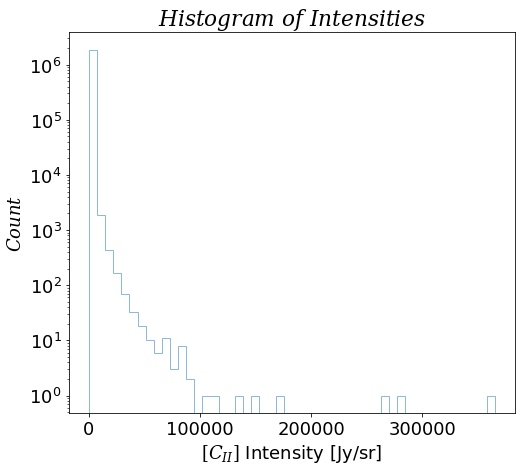

In [42]:
n_zdex06, bins, _ = plt.hist(cii_zdex06.value.flatten(), bins = 50, alpha = 0.5, histtype = 'step')

center = (bins[:-1] + bins[1:]) / 2
    
plt.xlabel(r'$[C_{II}]$ Intensity [Jy/sr]')
plt.ylabel(r'$Count$')
plt.yscale('log')
plt.title(r'$Histogram\ of\ Intensities$')

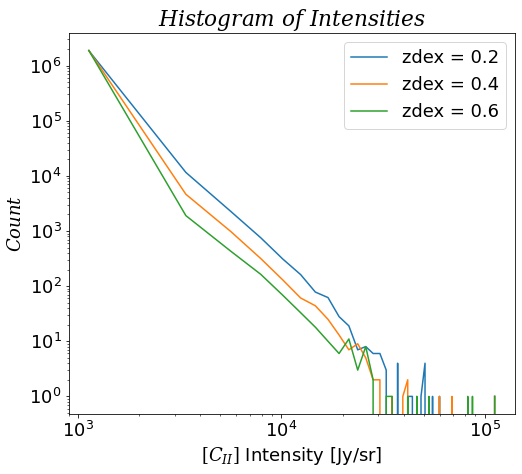

In [53]:
plt.plot(center, n_zdex02, label = 'zdex = 0.2')
plt.plot(center, n_zdex04, label = 'zdex = 0.4')
plt.plot(center, n_zdex06, label = 'zdex = 0.6')

plt.xlabel(r'$[C_{II}]$ Intensity [Jy/sr]')
plt.xticks(np.array([0, 100000, 200000, 300000]))
plt.ylabel(r'$Count$')
plt.yscale('log')
plt.xscale('log')
plt.title(r'$Histogram\ of\ Intensities$')

plt.legend()

/tmp/ipykernel_229974/1638296589.py:1: RuntimeWarning: divide by zero encountered in divide
  plt.plot(center, np.log(n_zdex02/n_zdex04), label = '0.2/0.4')
/tmp/ipykernel_229974/1638296589.py:1: RuntimeWarning: invalid value encountered in divide
  plt.plot(center, np.log(n_zdex02/n_zdex04), label = '0.2/0.4')
/tmp/ipykernel_229974/1638296589.py:1: RuntimeWarning: divide by zero encountered in log
  plt.plot(center, np.log(n_zdex02/n_zdex04), label = '0.2/0.4')
/tmp/ipykernel_229974/1638296589.py:2: RuntimeWarning: divide by zero encountered in divide
  plt.plot(center, np.log(n_zdex06/n_zdex04), label = '0.6/0.4')
/tmp/ipykernel_229974/1638296589.py:2: RuntimeWarning: invalid value encountered in divide
  plt.plot(center, np.log(n_zdex06/n_zdex04), label = '0.6/0.4')
/tmp/ipykernel_229974/1638296589.py:2: RuntimeWarning: divide by zero encountered in log
  plt.plot(center, np.log(n_zdex06/n_zdex04), label = '0.6/0.4')


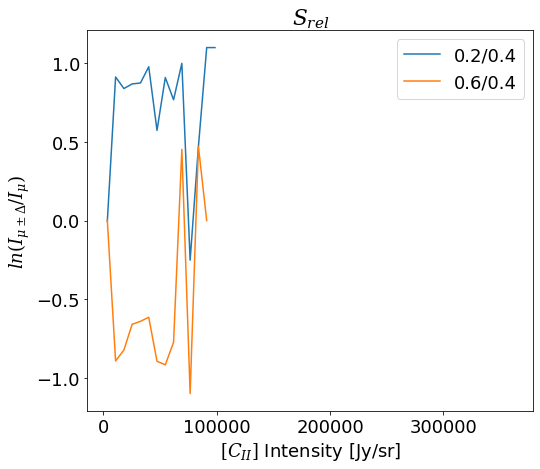

In [44]:
plt.plot(center, np.log(n_zdex02/n_zdex04), label = '0.2/0.4')
plt.plot(center, np.log(n_zdex06/n_zdex04), label = '0.6/0.4')

plt.xlabel(r'$[C_{II}]$ Intensity [Jy/sr]')
plt.xticks(np.array([0, 100000, 200000, 300000]))
plt.ylabel(r'$ln(I_{\mu \pm \Delta}/I_{\mu})$')
#plt.yscale('log')
plt.title(r'$S_{rel}$')

plt.legend()

Lightcone average:

In [4]:
binning = np.logspace(1, 5, 50)

In [5]:
lc_paths = '/home/dongwooc/scratchspace/pprun_hiz_npz/'
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(lc_paths) if isfile(join(lc_paths, f))]
onlyfiles.remove('pksc2npz_5313591.out')
onlyfiles.remove('pksc2npz.sh')
for i in range(len(onlyfiles)):
    onlyfiles[i] = lc_paths+onlyfiles[i]

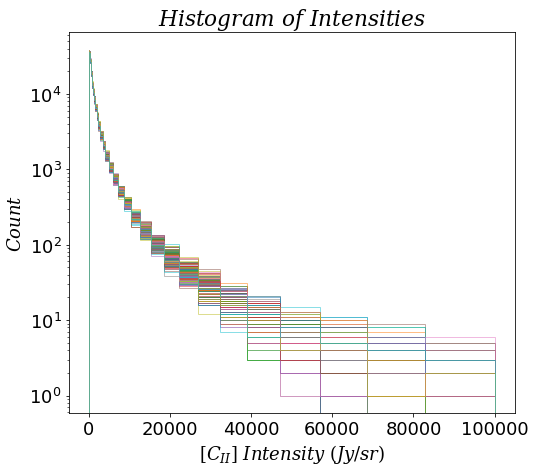

In [6]:
n_zdex04_tot = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    sig_nuObs270 = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e10/sig/cii_sig'+str(i)+'.npy')
    n_zdex04_tot[i], bins, _ = plt.hist(sig_nuObs270.flatten(), bins = binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
    plt.ylabel(r'$Count$')
    plt.yscale('log')
    plt.title(r'$Histogram\ of\ Intensities$')

center = (bins[:-1] + bins[1:]) / 2

In [7]:
avg_zdex04 = np.nanmean(n_zdex04_tot, axis = 0)

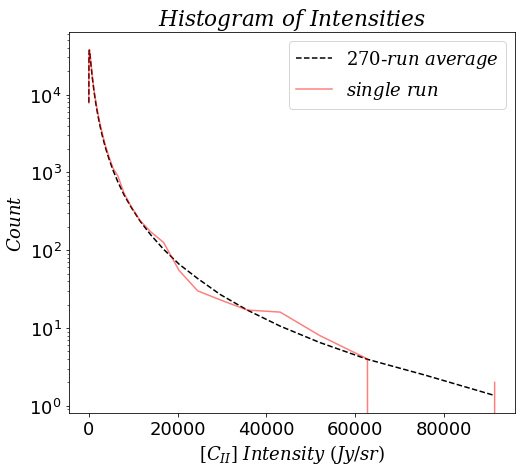

In [7]:
plt.plot(center, avg_zdex04, '--k', label = r'$270$-$run\ average$')
plt.plot(center, n_zdex04_tot[4], 'r', label = r'$single\ run$', alpha = 0.5)
plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
plt.ylabel(r'$Count$')
plt.yscale('log')
plt.title(r'$Histogram\ of\ Intensities$')
plt.legend()

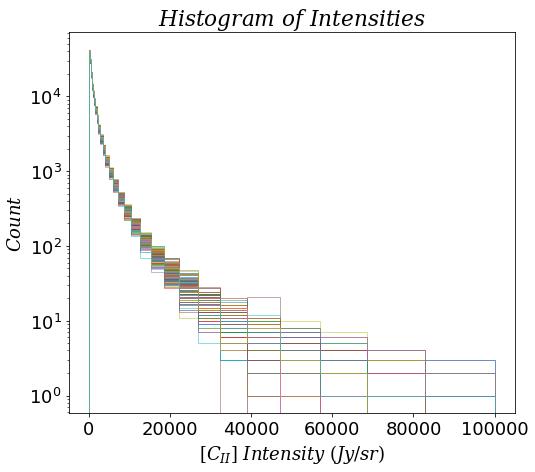

In [8]:
n_zdex03_tot = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    sig_zdex03 = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex03/sig/cii_sig'+str(i)+'.npy')
    n_zdex03_tot[i], bins, _ = plt.hist(sig_zdex03.flatten(), bins = binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
    plt.ylabel(r'$Count$')
    plt.yscale('log')
    plt.title(r'$Histogram\ of\ Intensities$')

center = (bins[:-1] + bins[1:]) / 2

In [9]:
avg_zdex03 = np.nanmean(n_zdex03_tot, axis = 0)

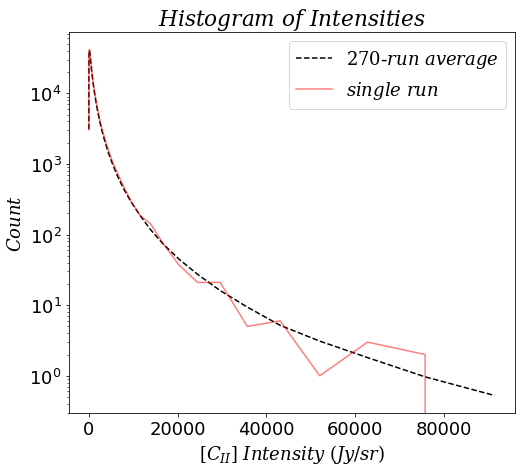

In [61]:
plt.plot(center, avg_zdex03, '--k', label = r'$270$-$run\ average$')
plt.plot(center, n_zdex03_tot[4], 'r', label = r'$single\ run$', alpha = 0.5)
plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
plt.ylabel(r'$Count$')
plt.yscale('log')
plt.title(r'$Histogram\ of\ Intensities$')
plt.legend()

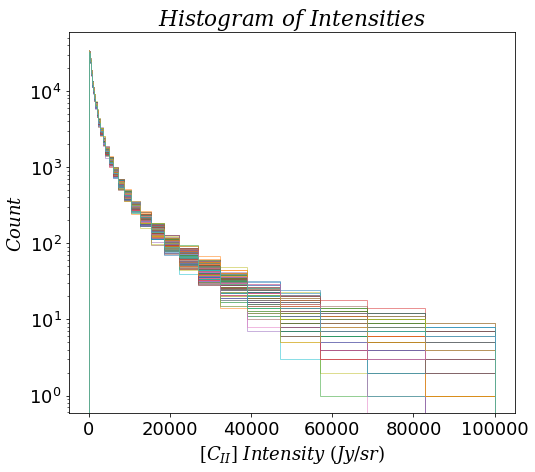

In [10]:
n_zdex05_tot = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    sig_zdex05 = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex05/sig/cii_sig'+str(i)+'.npy')
    n_zdex05_tot[i], bins, _ = plt.hist(sig_zdex05.flatten(), bins = binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
    plt.ylabel(r'$Count$')
    plt.yscale('log')
    plt.title(r'$Histogram\ of\ Intensities$')

center = (bins[:-1] + bins[1:]) / 2

In [11]:
avg_zdex05 = np.nanmean(n_zdex05_tot, axis = 0)

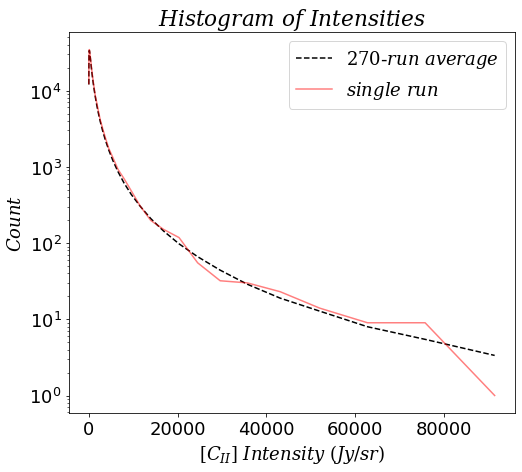

In [64]:
plt.plot(center, avg_zdex05, '--k', label = r'$270$-$run\ average$')
plt.plot(center, n_zdex05_tot[4], 'r', label = r'$single\ run$', alpha = 0.5)
plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
plt.ylabel(r'$Count$')
plt.yscale('log')
plt.title(r'$Histogram\ of\ Intensities$')
plt.legend()

In [70]:
len(center[0:])

49

In [12]:
n = 0

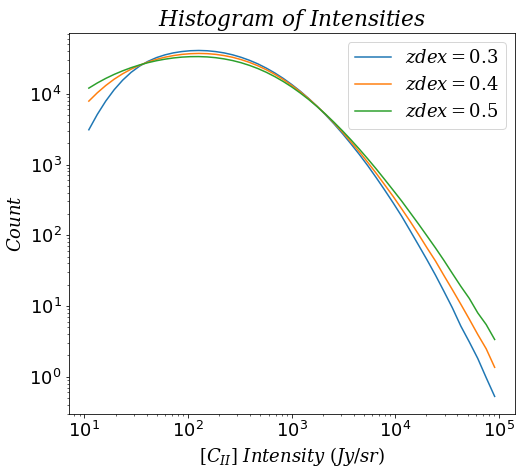

In [13]:
plt.plot(center, avg_zdex03, label = r'$zdex = 0.3$')
plt.plot(center, avg_zdex04, label = r'$zdex = 0.4$')
plt.plot(center, avg_zdex05, label = r'$zdex = 0.5$')

plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
plt.ylabel(r'$Count$')
plt.title(r'$Histogram\ of\ Intensities$')

plt.yscale('log')
plt.xscale('log')

plt.legend()

#plt.savefig('paper_figs/dsrel/zdex_hist.png', bbox_inches = 'tight')

This makes a lot of sense: as zdex increases, there is more scatter in metallicity. As the scatter in metallicity increases, the scatter in $[C_{II}]$ intensities increases since $L_{[C_{II}]} \propto Z$. As the scatter in $L_{[C_{II}]}$ increases, the distribution of $[C_{II}]$ intensities are more scattered around its average: the intensities before the scattering are pushed up or down with a magnitude proportional to the magnitude of the scatter. As a result, more values are drawn towards the extremes. That means we should expect that as scatter increases,the distribution of intensities flattens towards the center and increases towards the edges, which is what we observe here.

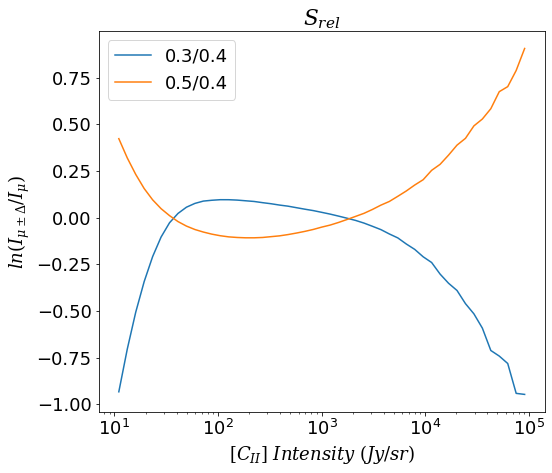

In [14]:
plt.plot(center[n:], np.log(avg_zdex03/avg_zdex04)[n:], label = '0.3/0.4')
plt.plot(center[n:], np.log(avg_zdex05/avg_zdex04)[n:], label = '0.5/0.4')

plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
plt.ylabel(r'$ln(I_{\mu \pm \Delta}/I_{\mu})$')
plt.title(r'$S_{rel}$')
plt.xscale('log')
#plt.yscale('log')

plt.legend()

#plt.savefig('paper_figs/dsrel/zdex_srel.png', bbox_inches = 'tight')

$\alpha_{[C_{II}]}$:

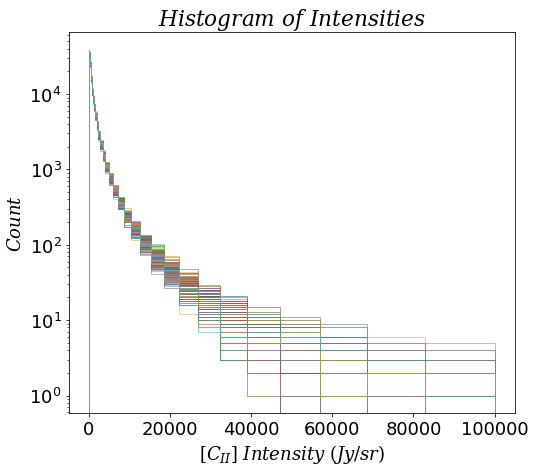

In [15]:
n_a20_tot = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    sig_a20 = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex04/alpha_cii_0-020/sig/cii_sig'+str(i)+'.npy')
    n_a20_tot[i], bins, _ = plt.hist(sig_a20.flatten(), bins = binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
    plt.ylabel(r'$Count$')
    plt.yscale('log')
    plt.title(r'$Histogram\ of\ Intensities$')

center = (bins[:-1] + bins[1:]) / 2

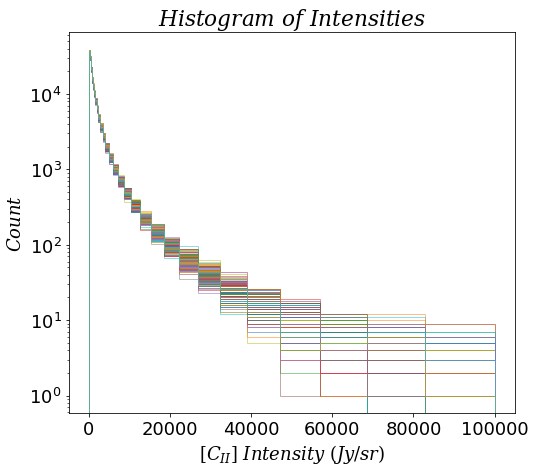

In [16]:
n_a28_tot = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    sig_a28 = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex04/alpha_cii_0-028/sig/cii_sig'+str(i)+'.npy')
    n_a28_tot[i], bins, _ = plt.hist(sig_a28.flatten(), bins = binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
    plt.ylabel(r'$Count$')
    plt.yscale('log')
    plt.title(r'$Histogram\ of\ Intensities$')

center = (bins[:-1] + bins[1:]) / 2

In [17]:
avg_a20 = np.nanmean(n_a20_tot, axis = 0)
avg_a28 = np.nanmean(n_a28_tot, axis = 0)
avg_a24 = avg_zdex04

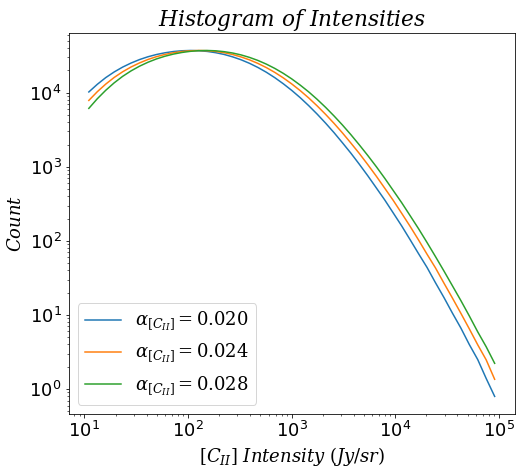

In [18]:
plt.plot(center, avg_a20, label = r'$\alpha_{[C_{II}]} = 0.020$')
plt.plot(center, avg_a24, label = r'$\alpha_{[C_{II}]} = 0.024$')
plt.plot(center, avg_a28, label = r'$\alpha_{[C_{II}]} = 0.028$')

plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
plt.ylabel(r'$Count$')
plt.title(r'$Histogram\ of\ Intensities$')

plt.yscale('log')
plt.xscale('log')

plt.legend()

#plt.savefig('paper_figs/dsrel/alpha_cii_hist.png', bbox_inches = 'tight')

Again, the results here make a lot of sense: $\alpha_{[C_{II}]}$ is the scaling factor of $L_{[C_{II}]}$. If we increase it, we therefore expect the whole distribution of $[C_{II}]$ intensities to increase uniformly. And that is what we observe with the histograms: there are less halos with lower $[C_{II}]$ intensity and more halos with higher $[C_{II}]$ intensity as $\alpha_{[C_{II}]}$ increases.

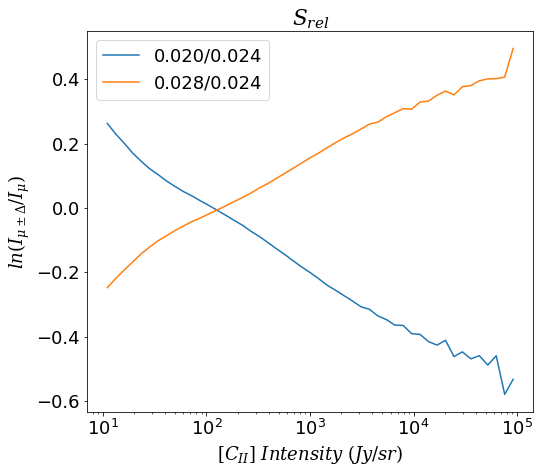

In [19]:
plt.plot(center[n:], np.log(avg_a20/avg_a24)[n:], label = '0.020/0.024')
plt.plot(center[n:], np.log(avg_a28/avg_a24)[n:], label = '0.028/0.024')

plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
plt.ylabel(r'$ln(I_{\mu \pm \Delta}/I_{\mu})$')
plt.title(r'$S_{rel}$')
plt.xscale('log')


plt.legend()
#plt.savefig('paper_figs/dsrel/alpha_cii_srel.png', bbox_inches = 'tight')

$\alpha_{M_{HI}}$:

In [20]:
avg_basis = avg_zdex04

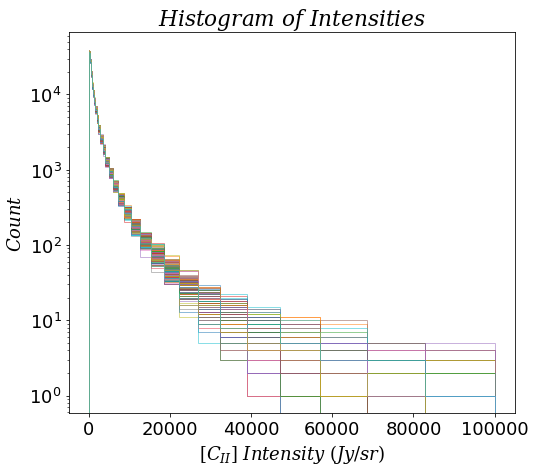

In [21]:
n_mhi68_tot = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    sig_mhi68 = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex04/alpha_cii_0-024/alpha_mhi_0-68/sig/cii_sig'+str(i)+'.npy')
    n_mhi68_tot[i], bins, _ = plt.hist(sig_mhi68.flatten(), bins = binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
    plt.ylabel(r'$Count$')
    plt.yscale('log')
    plt.title(r'$Histogram\ of\ Intensities$')

center = (bins[:-1] + bins[1:]) / 2

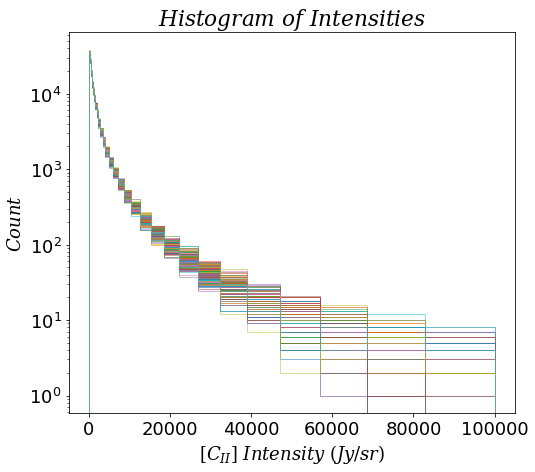

In [22]:
n_mhi80_tot = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    sig_mhi80 = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex04/alpha_cii_0-024/alpha_mhi_0-80/sig/cii_sig'+str(i)+'.npy')
    n_mhi80_tot[i], bins, _ = plt.hist(sig_mhi80.flatten(), bins = binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
    plt.ylabel(r'$Count$')
    plt.yscale('log')
    plt.title(r'$Histogram\ of\ Intensities$')

center = (bins[:-1] + bins[1:]) / 2

In [23]:
avg_mhi68 = np.nanmean(n_mhi68_tot, axis = 0)
avg_mhi80 = np.nanmean(n_mhi80_tot, axis = 0)
avg_mhi74 = avg_basis

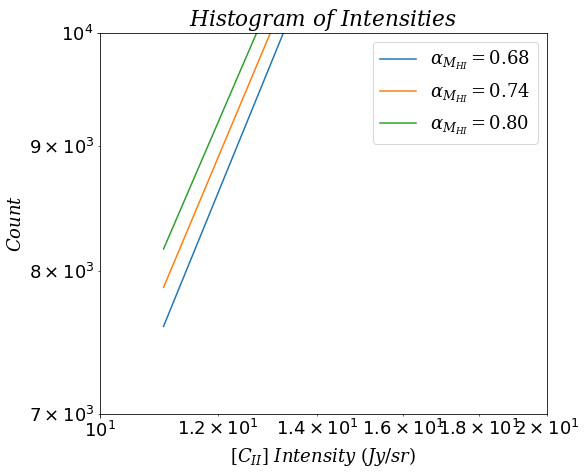

In [58]:
plt.plot(center, avg_mhi68, label = r'$\alpha_{M_{HI}} = 0.68$')
plt.plot(center, avg_mhi74, label = r'$\alpha_{M_{HI}} = 0.74$')
plt.plot(center, avg_mhi80, label = r'$\alpha_{M_{HI}} = 0.80$')

plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
plt.ylabel(r'$Count$')
plt.title(r'$Histogram\ of\ Intensities$')

plt.yscale('log')
plt.xscale('log')

plt.legend()

plt.xlim([(10**1), 2*(10**1)])
plt.ylim([7*(10**3), (10**4)])

plt.savefig('paper_figs/dsrel/alpha_mhi/alpha_mhi_hist_left.png', bbox_inches = 'tight')

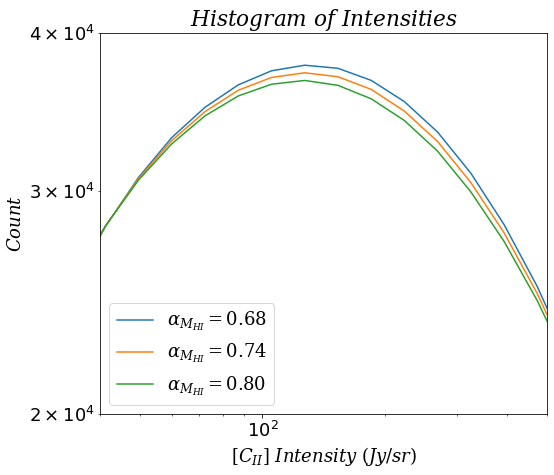

In [60]:
plt.plot(center, avg_mhi68, label = r'$\alpha_{M_{HI}} = 0.68$')
plt.plot(center, avg_mhi74, label = r'$\alpha_{M_{HI}} = 0.74$')
plt.plot(center, avg_mhi80, label = r'$\alpha_{M_{HI}} = 0.80$')

plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
plt.ylabel(r'$Count$')
plt.title(r'$Histogram\ of\ Intensities$')

plt.yscale('log')
plt.xscale('log')

plt.legend()

plt.xlim([4*(10**1), 5*(10**2)])
plt.ylim([2*(10**4), 4*(10**4)])

plt.savefig('paper_figs/dsrel/alpha_mhi/alpha_mhi_hist_top.png', bbox_inches = 'tight')

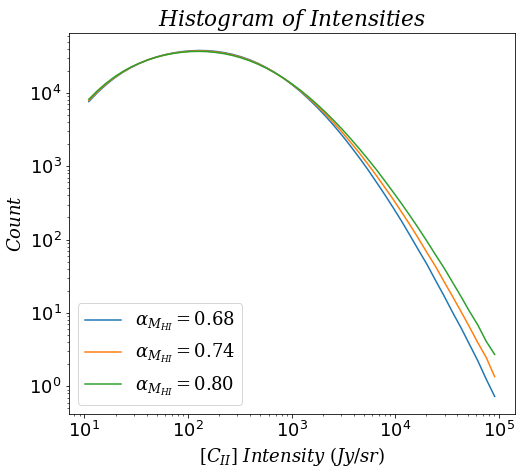

In [26]:
plt.plot(center, avg_mhi68, label = r'$\alpha_{M_{HI}} = 0.68$')
plt.plot(center, avg_mhi74, label = r'$\alpha_{M_{HI}} = 0.74$')
plt.plot(center, avg_mhi80, label = r'$\alpha_{M_{HI}} = 0.80$')

plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
plt.ylabel(r'$Count$')
plt.title(r'$Histogram\ of\ Intensities$')

plt.yscale('log')
plt.xscale('log')

plt.legend()

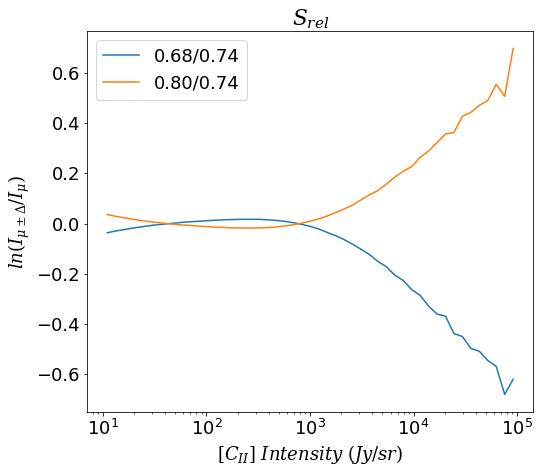

In [27]:
plt.plot(center[n:], np.log(avg_mhi68/avg_mhi74)[n:], label = '0.68/0.74')
plt.plot(center[n:], np.log(avg_mhi80/avg_mhi74)[n:], label = '0.80/0.74')

plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
plt.ylabel(r'$ln(I_{\mu \pm \Delta}/I_{\mu})$')
plt.title(r'$S_{rel}$')
plt.xscale('log')


plt.legend()
#plt.savefig('paper_figs/dsrel/alpha_mhi_srel.png', bbox_inches = 'tight')

Investigation:

In [28]:
def MH1_fit(M, M_0, M_min, alphaMH1):
    x = M/M_min
    return M_0 * ((x)**alphaMH1) * np.exp(-1/((x)**0.35))

Loading .npz catalogues...


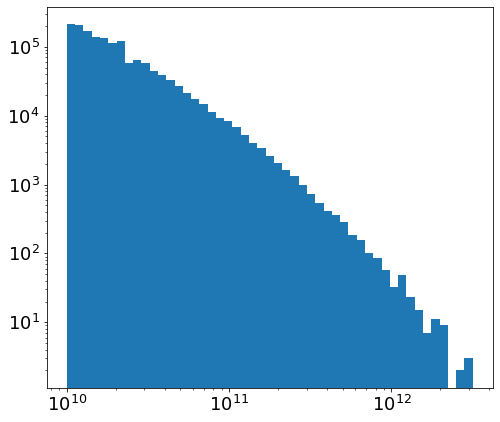

In [29]:
plt.hist(m_cii.halos.M, bins = np.logspace(10, 12.5, 50))
plt.xscale('log')
plt.yscale('log')

In [30]:
m_cii.model_par

{'zdex': 0.4,
 'M0': 1900000000.0,
 'Mmin': 20000000000,
 'alpha_MH1': 0.74,
 'alpha_LCII': 0.024,
 'BehrooziFile': 'sfr_reinterp.dat'}

In [46]:
M_0 = 1900000000.0
M_min = 20000000000
alpha_MHI = 0.74
halos_M = m_cii.halos.M
MHI_sing = MH1_fit(halos_M, M_0, M_min, alpha_MHI)
MHI_sing2 = MH1_fit(halos_M, M_0, M_min, 0.5)
MHI_sing3 = MH1_fit(halos_M, M_0, M_min, 0.6)
MHI_sing4 = MH1_fit(halos_M, M_0, M_min, 0.8)
MHI_sing5 = MH1_fit(halos_M, M_0, M_min, 0.9)

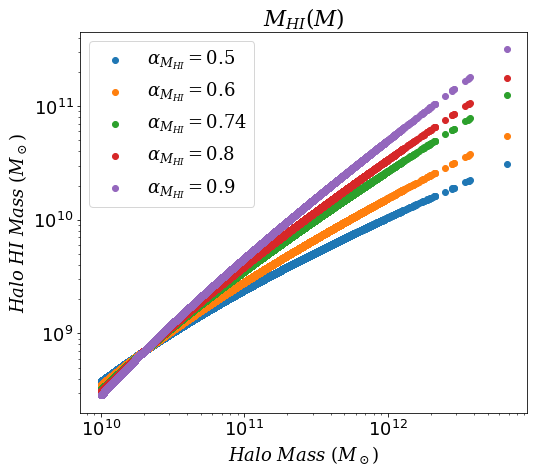

In [62]:
plt.scatter(halos_M, MHI_sing2, label = r'$\alpha_{M_{HI}}=0.5$')
plt.scatter(halos_M, MHI_sing3, label = r'$\alpha_{M_{HI}}=0.6$')
plt.scatter(halos_M, MHI_sing, label = r'$\alpha_{M_{HI}}=0.74$')
plt.scatter(halos_M, MHI_sing4, label = r'$\alpha_{M_{HI}}=0.8$')
plt.scatter(halos_M, MHI_sing5, label = r'$\alpha_{M_{HI}}=0.9$')

plt.xscale('log')
plt.yscale('log')

plt.ylabel(r'$Halo\ HI\ Mass\ (M_\odot)$')
plt.xlabel(r'$Halo\ Mass\ (M_\odot)$')
plt.title(r'$M_{HI}(M)$')
plt.legend()

plt.savefig('paper_figs/dsrel/alpha_mhi/mhi(m).png')

In [39]:
M_HIs = [0 for i in range(5)]
alpha_MHIs = np.array([0.5, 0.6, 0.74, 0.8, 0.9])
for i in range(5):
    M_HIs[i] = MH1_fit(halos_M, M_0, M_min, alpha_MHIs[i])

In [41]:
import random
rand_halos = random.sample([i for i in range(len(halos_M))], int(0.001*len(halos_M)))
rand_halos = np.array(rand_halos)

In [42]:
halos_M_rand = halos_M[rand_halos]
halos_MHI_rand = [0 for i in range(5)]
for i in range(5):
    halos_MHI_rand[i] = M_HIs[i][rand_halos]

In [ ]:
plt.scatter(halos_M_rand, halos_MHI_rand[0], label = r'$\alpha_{M_{HI}=$}'+str(alpha_MHIs[0]))
plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$Halo\ HI\ Mass$')
plt.xlabel(r'$Halo\ Mass$')
plt.title(r'$M_{HI}(M)$')
plt.legend()

Error in callback <function flush_figures at 0x7fe72e5848b0> (for post_execute):


$M_{min}$:

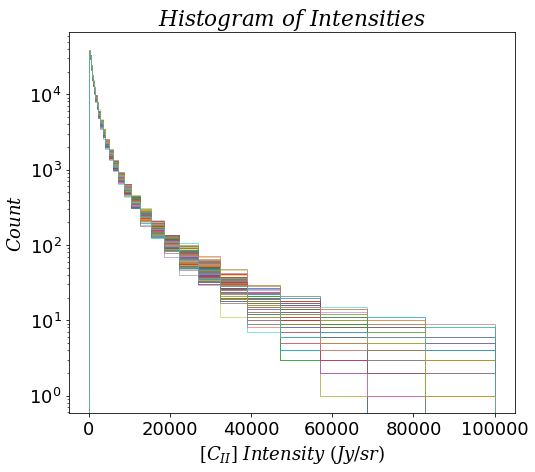

In [49]:
n_min99_tot = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    sig_mmin99 = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e9-9/sig/cii_sig'+str(i)+'.npy')
    n_min99_tot[i], bins, _ = plt.hist(sig_mmin99.flatten(), bins = binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
    plt.ylabel(r'$Count$')
    plt.yscale('log')
    plt.title(r'$Histogram\ of\ Intensities$')

center = (bins[:-1] + bins[1:]) / 2

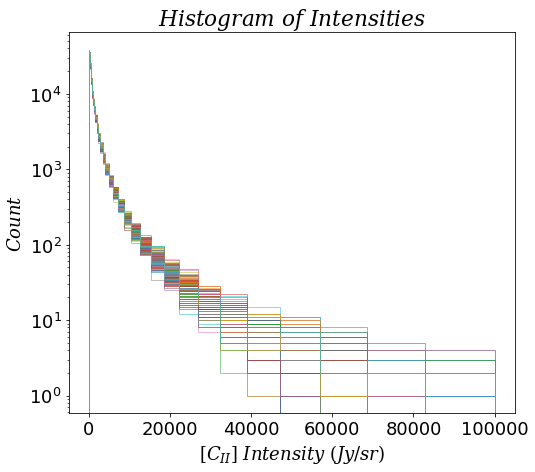

In [50]:
n_min01_tot = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    sig_mmin01 = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e10-1/sig/cii_sig'+str(i)+'.npy')
    n_min01_tot[i], bins, _ = plt.hist(sig_mmin01.flatten(), bins = binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
    plt.ylabel(r'$Count$')
    plt.yscale('log')
    plt.title(r'$Histogram\ of\ Intensities$')

center = (bins[:-1] + bins[1:]) / 2

In [51]:
avg_min99 = np.nanmean(n_min99_tot, axis = 0)
avg_min01 = np.nanmean(n_min01_tot, axis = 0)
avg_min10 = avg_basis

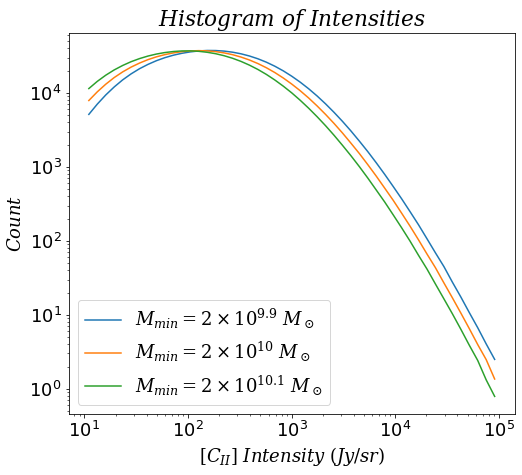

In [61]:
plt.plot(center, avg_min99, label = r'$M_{min} = 2 \times 10^{9.9}\ M_\odot$')
plt.plot(center, avg_min10, label = r'$M_{min} = 2 \times 10^{10}\ M_\odot$')
plt.plot(center, avg_min01, label = r'$M_{min} = 2 \times 10^{10.1}\ M_\odot$')

plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
plt.ylabel(r'$Count$')
plt.title(r'$Histogram\ of\ Intensities$')

plt.yscale('log')
plt.xscale('log')

plt.legend()
plt.savefig('paper_figs/dsrel/alpha_mmin_hist.png', bbox_inches = 'tight')

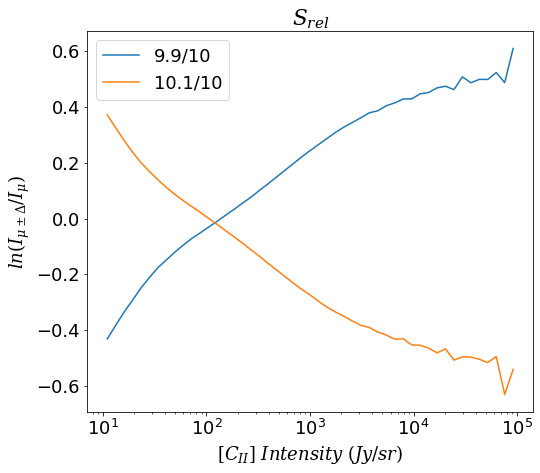

In [55]:
plt.plot(center[n:], np.log(avg_min99/avg_min10)[n:], label = '9.9/10')
plt.plot(center[n:], np.log(avg_min01/avg_min10)[n:], label = '10.1/10')

plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
plt.ylabel(r'$ln(I_{\mu \pm \Delta}/I_{\mu})$')
plt.title(r'$S_{rel}$')
plt.xscale('log')


plt.legend()
plt.savefig('paper_figs/dsrel/alpha_mmin_srel.png', bbox_inches = 'tight')